In [1]:
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt

/Users/guoj/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#confirm correct inference

In [4]:
z = np.random.randn(1000000)
x = z + np.random.randn(1000000)
q = norm.cdf(z,x/2,2**-0.5)

Text(0.5, 0, 'x')

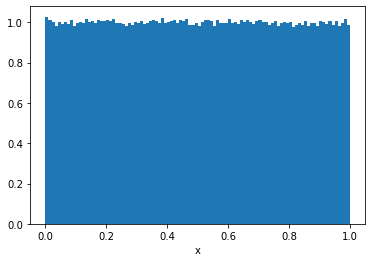

In [5]:
plt.hist(q,100,density = True)
plt.xlabel('x')

In [6]:
z = np.random.randint(1,5,1000000)
x = z + np.random.randn(1000000)
post_z1_r = norm.pdf(x,1,1)
post_z2_r = norm.pdf(x,2,1)
post_z3_r = norm.pdf(x,3,1)
post_z4_r = norm.pdf(x,4,1)
post_z1 = post_z1_r/(post_z1_r+post_z2_r+post_z3_r+post_z4_r)
post_z2 = post_z2_r/(post_z1_r+post_z2_r+post_z3_r+post_z4_r)
post_z3 = post_z3_r/(post_z1_r+post_z2_r+post_z3_r+post_z4_r)
post_z4 = post_z4_r/(post_z1_r+post_z2_r+post_z3_r+post_z4_r)

In [7]:
post = np.array([post_z1,post_z2,post_z3,post_z4])
qi =np.array([np.sum(post[:(z[i]-1),i])+ np.random.rand()*post[z[i]-1,i] for i in range(1000000)])

Text(0.5, 0, 'x')

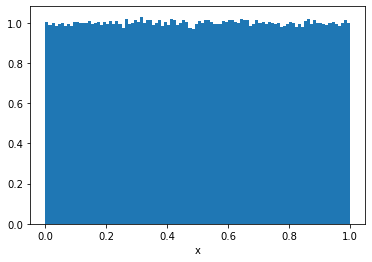

In [8]:
plt.hist(qi,100,density=True)
plt.xlabel('x')

In [9]:
#varification on correct inference
#zl,zr = 0,0; 0,1; 1,0; 1,1 mapped to a new variable z: 1, 2, 3, 4
zl = np.random.randint(0,2,1000000)
zr = np.random.randint(0,2,1000000)
z = 2*zr+zl+1
theta = np.random.rand(1000000)*2*np.pi-np.pi
kappa_l,kappa_r = 5,2
x_l = np.random.vonmises(theta,kappa_l*zl)
x_r = np.random.vonmises(theta,kappa_r*zr)
p_00_r = np.ones(1000000)
p_01_r = np.ones(1000000)
p_10_r = np.ones(1000000)
p_11_r = np.i0(np.abs(kappa_r*np.exp(1j*x_r)+kappa_l*np.exp(1j*x_l)))/np.i0(kappa_l)/np.i0(kappa_r)
p_00 = p_00_r/(p_00_r+p_01_r+p_10_r+p_11_r)
p_10 = p_10_r/(p_00_r+p_01_r+p_10_r+p_11_r)
p_01 = p_01_r/(p_00_r+p_01_r+p_10_r+p_11_r)
p_11 = p_11_r/(p_00_r+p_01_r+p_10_r+p_11_r)
post = np.array([p_00,p_01,p_10,p_11])
qi =np.array([np.sum(post[:(z[i]-1),i])+ np.random.rand()*post[z[i]-1,i] for i in range(1000000)])

Text(0, 0.5, 'density')

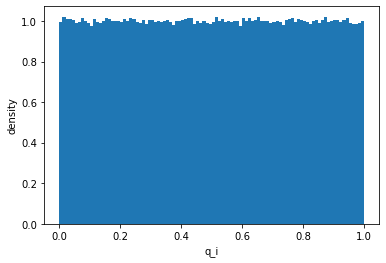

In [10]:
plt.hist(qi,100,density=True)
plt.xlabel('q_i')
plt.ylabel('density')

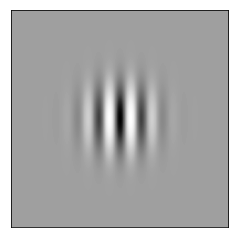

In [23]:
#plot gabor filter
theta = 0
lamda = 1
sigma = 1
X = np.arange(-5,5,0.01)
Y = np.arange(-5,5,0.01)
X,Y = np.meshgrid(X,Y)
X_dot = X*np.cos(theta)+Y*np.sin(theta)
Y_dot = -X*np.sin(theta)+Y*np.cos(theta)
G = np.exp(-(X_dot**2+lamda*Y_dot**2)/(2*sigma**2))*np.cos(2*np.pi*X_dot/lamda)
theta1 = np.pi/1.5
X_dot1 = X*np.cos(theta1)+Y*np.sin(theta1)
Y_dot1 = -X*np.sin(theta1)+Y*np.cos(theta1)
G1 = np.exp(-(X_dot1**2+lamda*Y_dot1**2)/(2*sigma**2))*np.cos(2*np.pi*X_dot1/lamda)
fig,ax = plt.subplots(1)
ax.set_box_aspect(1)
ax.matshow(G,cmap='Greys')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('diuuuuuuu.svg')

In [12]:
x_l = 2*G.flatten()/np.linalg.norm(G.flatten())
x_r = G1.flatten()/np.linalg.norm(G1.flatten())
x_l = x_l.reshape(len(x_l),1)
x_r = x_r.reshape(len(x_l),1)
z_l = 1
z_r = 0
w = np.hstack((G.flatten().reshape(len(x_l),1)/np.linalg.norm(G.flatten()),G1.flatten().reshape(len(x_l),1)/np.linalg.norm(G1.flatten())))
std = 0.1
std_0 = 1
i = np.identity(2)
sigma = np.linalg.inv((z_l+z_r)/std**2*np.matmul(w.T,w)+i/std_0**2)
mu = 1/std**2*np.matmul(sigma,np.matmul(w.T,(z_l*x_l+z_r*x_r)))
print(sigma)

[[ 9.90135089e-03 -5.97686104e-05]
 [-5.97686104e-05  9.90135089e-03]]


In [13]:
w.shape

(1600, 2)

In [14]:
cor = 4*np.array([[1,0.2],[0.2,1]])
A = np.linalg.cholesky(cor)
eps = np.matmul(A,np.random.randn(2,1000000))

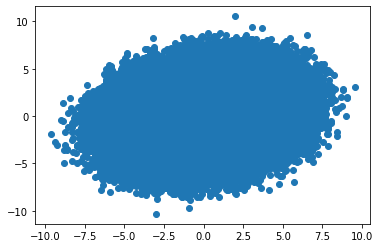

In [15]:
plt.scatter(eps[0,:],eps[1,:])

In [16]:
def sample_alpha(w,x_l,x_r,z_l,z_r,std,std_0):
    no_basis = w.shape[1]
    i = np.identity(no_basis)
    sigma = np.linalg.inv((z_l+z_r)/std**2*np.matmul(w.T,w)+i/std_0**2)
    mu = 1/std**2*np.matmul(sigma,np.matmul(w.T,(z_l*x_l+z_r*x_r)))
    return mu+np.matmul(np.linalg.cholesky(sigma),np.random.randn(no_basis).reshape(no_basis,1))

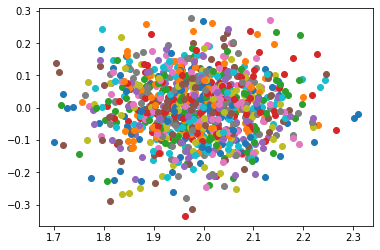

In [61]:
z_l,z_r = 1,0
for i in range(1000):
    plt.scatter(sample_alpha(w,x_l,x_r,z_l,z_r,std,std_0)[0],sample_alpha(w,x_l,x_r,z_l,z_r,std,std_0)[1])